# 선형회귀

## 보스턴 집값 예측 데이터 
각 데이터베이스의 레코드는 보스턴 교외 또는 마을을 설명한다.

이 데이터는 1970년 보스턴 표준 도시 통계 지역(SMSA)에서 수집되었다. (UCI ML Repositor에서 발췌):

- CRIM: 마을별 1인당 범죄율
- ZN: 25,000 평방피트를 초과하는 주거용 토지 비율
- INDUS: 비소매 업종이 차지하는 마을별 비율
- CHAS: 찰스강 더미 변수 (강과 인접한 지역이면 1, 아니면 0)
- NOX: 질소 산화물 농도 (1,000만분의 1 단위)
- RM: 주택당 평균 방 개수
- AGE: 1940년 이전에 지어진 자가 소유 주택 비율
- DIS: 보스턴 고용 센터 5곳까지의 가중 거리
- RAD: 방사형 고속도로 접근성 지수
- TAX: \$10,000당 전체 재산세율
- PTRATIO: 마을별 학생-교사 비율
- B: $1000(Bk−0.63)^2$ (여기서 Bk는 마을별 흑인 비율)
- LSTAT: 저소득층 인구 비율
- MEDV: (타겟) Median House Value 자가 소유 주택의 중앙값 (단위: \$1000s)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
boston_df = pd.read_csv('../../data/boston_housing_train.csv')

In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


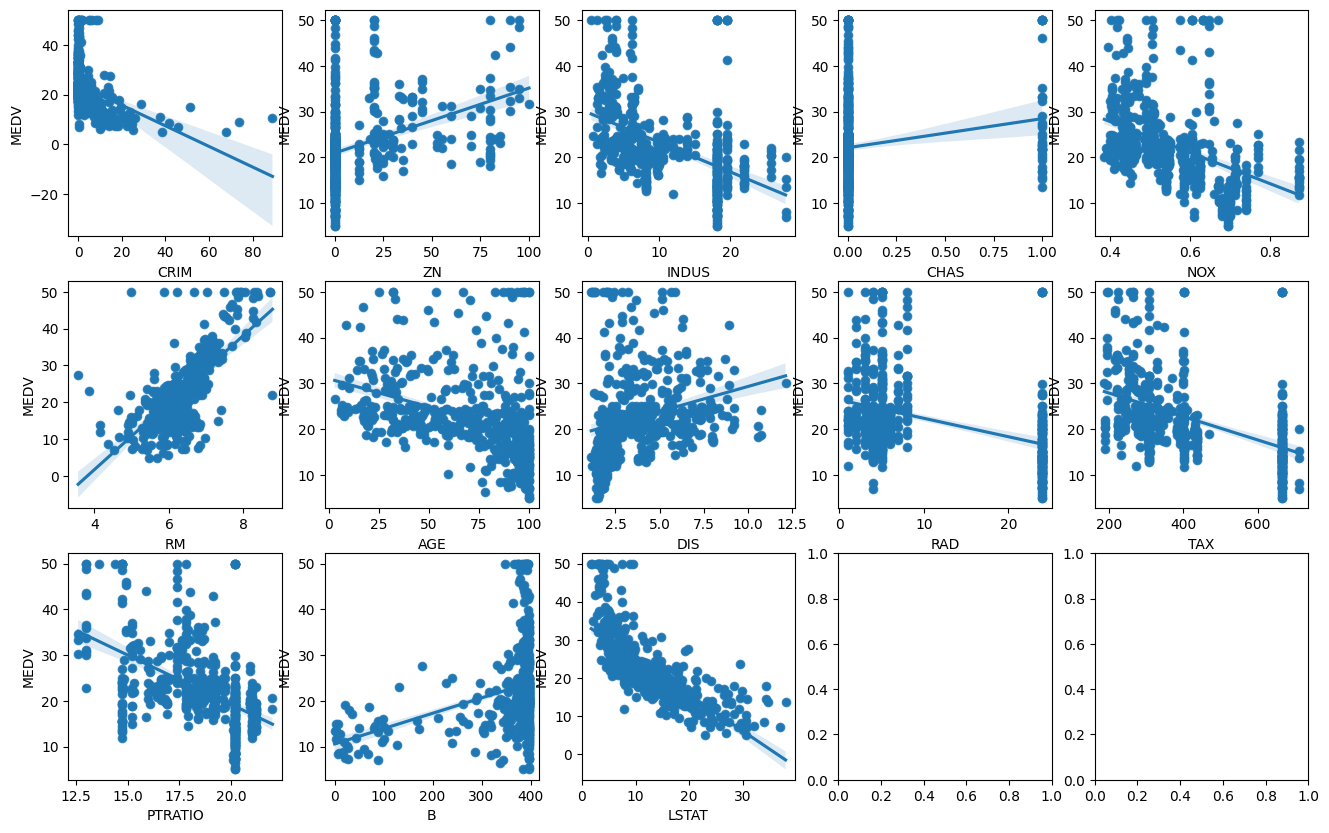

In [15]:
fig, ax = plt.subplots(figsize=(16, 10), ncols=5, nrows=3)
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

for i, col_name in enumerate(columns):
    row = i // 5
    col = i % 5
    ax_temp = ax[row][col]

    sns.scatterplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp)
    sns.regplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp)

In [16]:
from sklearn.model_selection import train_test_split

x = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [18]:
# 학습 및 평가
from sklearn.linear_model import LinearRegression

# 학습
lr = LinearRegression()
lr.fit(x_train, y_train)

# 평가
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.748087259862344, 0.684426728352709)

In [21]:
y_pred = lr.predict(x_test)
y_pred[:5]

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064])

In [22]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score
# 다른 평가 지표
def evaluate_regression(y_true, y_pred):
    mse = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f'MSE: {mse} RMSE: {rmse},MAE: {mae}, R2: {r2}')

evaluate_regression(y_test, y_pred)

MSE: 3.0609395954370795 RMSE: 4.700924890603791,MAE: 0.16199174591632962, R2: 0.684426728352709


In [23]:
print(lr.coef_)
print(lr.intercept_)

[-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
29.83642016383845


## 다항회귀
- 회귀식이 선형이 아닌 2차, 3차 방정식

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False, degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

print(x_train.shape, x_train_poly.shape, x_test.shape, x_test_poly.shape)

print(poly.get_feature_names_out())

(379, 13) (379, 104) (127, 13) (127, 104)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'CRIM^2' 'CRIM ZN' 'CRIM INDUS' 'CRIM CHAS' 'CRIM NOX'
 'CRIM RM' 'CRIM AGE' 'CRIM DIS' 'CRIM RAD' 'CRIM TAX' 'CRIM PTRATIO'
 'CRIM B' 'CRIM LSTAT' 'ZN^2' 'ZN INDUS' 'ZN CHAS' 'ZN NOX' 'ZN RM'
 'ZN AGE' 'ZN DIS' 'ZN RAD' 'ZN TAX' 'ZN PTRATIO' 'ZN B' 'ZN LSTAT'
 'INDUS^2' 'INDUS CHAS' 'INDUS NOX' 'INDUS RM' 'INDUS AGE' 'INDUS DIS'
 'INDUS RAD' 'INDUS TAX' 'INDUS PTRATIO' 'INDUS B' 'INDUS LSTAT' 'CHAS^2'
 'CHAS NOX' 'CHAS RM' 'CHAS AGE' 'CHAS DIS' 'CHAS RAD' 'CHAS TAX'
 'CHAS PTRATIO' 'CHAS B' 'CHAS LSTAT' 'NOX^2' 'NOX RM' 'NOX AGE' 'NOX DIS'
 'NOX RAD' 'NOX TAX' 'NOX PTRATIO' 'NOX B' 'NOX LSTAT' 'RM^2' 'RM AGE'
 'RM DIS' 'RM RAD' 'RM TAX' 'RM PTRATIO' 'RM B' 'RM LSTAT' 'AGE^2'
 'AGE DIS' 'AGE RAD' 'AGE TAX' 'AGE PTRATIO' 'AGE B' 'AGE LSTAT' 'DIS^2'
 'DIS RAD' 'DIS TAX' 'DIS PTRATIO' 'DIS B' 'DIS LSTAT' 'RAD^2' 'RAD TAX'
 'RAD PTRATIO' 'RAD B' 'RAD LSTAT' 'TAX^2

In [25]:
# 학습
lr_poly = LinearRegression()
lr_poly.fit(x_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
# 평가
lr_poly.score(x_test_poly, y_test)
y_pred = lr_poly.predict(x_test_poly)
evaluate_regression(y_test, y_pred)

MSE: 2.5831967744134205 RMSE: 3.961998968533213,MAE: 0.14515612454552482, R2: 0.7758378393362159


In [ ]:
# df 생성
# 시각화
# 다중회귀
# 다항회귀